In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_score,
    recall_score, f1_score, classification_report
)
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

In [32]:
# Load dataset
df = pd.read_csv("addiction_population_data.csv")

# Create target column 'risk'
df['risk'] = ((df['smokes_per_day'] > 5) | (df['drinks_per_week'] > 5)).astype(int)

# Select features and target
features = ['age', 'gender', 'annual_income_usd', 'has_health_issues', 'sleep_hours', 'bmi']
X = df[features].copy()
y = df['risk']

# Encode categorical features
le = LabelEncoder()
X['gender'] = le.fit_transform(X['gender'])
X['has_health_issues'] = X['has_health_issues'].apply(lambda x: 1 if x == True else 0)

# Split into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [33]:
#Train Logistic Regression Model
log_model = LogisticRegression(max_iter=1000, solver='liblinear')
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

print(" Logistic Regression Results (70/30 split):")
print(" Accuracy:", accuracy_score(y_test, log_pred))
print(" Classification Report:\n", classification_report(y_test, log_pred, zero_division=0))


 Logistic Regression Results (70/30 split):
 Accuracy: 0.96
 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.96      1.00      0.98       864

    accuracy                           0.96       900
   macro avg       0.48      0.50      0.49       900
weighted avg       0.92      0.96      0.94       900



In [34]:
#Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print("\n Decision Tree Classifier Results (70/30 split):")
print(" Accuracy:", accuracy_score(y_test, dt_pred))
print(" Classification Report:\n", classification_report(y_test, dt_pred, zero_division=0))



 Decision Tree Classifier Results (70/30 split):
 Accuracy: 0.9033333333333333
 Classification Report:
               precision    recall  f1-score   support

           0       0.07      0.11      0.08        36
           1       0.96      0.94      0.95       864

    accuracy                           0.90       900
   macro avg       0.51      0.52      0.52       900
weighted avg       0.93      0.90      0.91       900



In [35]:
#Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("\n Random Forest Classifier Results (70/30 split):")
print(" Accuracy:", accuracy_score(y_test, rf_pred))
print(" Classification Report:\n", classification_report(y_test, rf_pred, zero_division=0))



 Random Forest Classifier Results (70/30 split):
 Accuracy: 0.96
 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.96      1.00      0.98       864

    accuracy                           0.96       900
   macro avg       0.48      0.50      0.49       900
weighted avg       0.92      0.96      0.94       900



In [36]:
#Accuracy Scores
print("\n Accuracy Comparison:")
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))



 Accuracy Comparison:
Logistic Regression Accuracy: 0.96
Decision Tree Accuracy: 0.9033333333333333
Random Forest Accuracy: 0.96


In [37]:
#Confusion Matrices
print("\n Confusion Matrices:")
print("Logistic Regression:\n", confusion_matrix(y_test, log_pred))
print("Decision Tree:\n", confusion_matrix(y_test, dt_pred))
print("Random Forest:\n", confusion_matrix(y_test, rf_pred))



 Confusion Matrices:
Logistic Regression:
 [[  0  36]
 [  0 864]]
Decision Tree:
 [[  4  32]
 [ 55 809]]
Random Forest:
 [[  0  36]
 [  0 864]]


In [38]:
#Precision Scores
print("\n Precision Scores:")
print("Logistic Regression:", precision_score(y_test, log_pred, zero_division=0))
print("Decision Tree:", precision_score(y_test, dt_pred, zero_division=0))
print("Random Forest:", precision_score(y_test, rf_pred, zero_division=0))



 Precision Scores:
Logistic Regression: 0.96
Decision Tree: 0.9619500594530321
Random Forest: 0.96


In [39]:
#Recall Scores
print("\n Recall Scores:")
print("Logistic Regression:", recall_score(y_test, log_pred, zero_division=0))
print("Decision Tree:", recall_score(y_test, dt_pred, zero_division=0))
print("Random Forest:", recall_score(y_test, rf_pred, zero_division=0))



 Recall Scores:
Logistic Regression: 1.0
Decision Tree: 0.9363425925925926
Random Forest: 1.0


In [40]:
#F1 Scores
print("\n F1 Scores:")
print("Logistic Regression:", f1_score(y_test, log_pred, zero_division=0))
print("Decision Tree:", f1_score(y_test, dt_pred, zero_division=0))
print("Random Forest:", f1_score(y_test, rf_pred, zero_division=0))



 F1 Scores:
Logistic Regression: 0.9795918367346939
Decision Tree: 0.9489736070381232
Random Forest: 0.9795918367346939


In [41]:
#Flagging High-Risk Individuals
# Flag high-risk individuals using Random Forest
df['risk_flag'] = rf_model.predict(X)

# Get top 10 high-risk individuals
high_risk_individuals = df[df['risk_flag'] == 1][
    ['age', 'gender', 'bmi', 'smokes_per_day', 'drinks_per_week', 'risk_flag']
].head(10)

# Print them
print("\n First 10 Flagged High-Risk Individuals (Random Forest):")
print(high_risk_individuals)



 First 10 Flagged High-Risk Individuals (Random Forest):
   age  gender   bmi  smokes_per_day  drinks_per_week  risk_flag
0   66   Other  22.4               5                4          1
1   29    Male  24.1              11                3          1
2   75    Male  22.2              13                4          1
3   35   Other  25.5               7                4          1
4   38  Female  31.2               8                2          1
5   17    Male  29.3               6                4          1
6   36    Male  32.6               9                5          1
7   67    Male  24.6               8                3          1
8   16   Other  24.6               8                6          1
9   44    Male  26.0               7                2          1


In [42]:
#Create risky_behavior column
def label_risky_behavior(row):
    return int(row['smokes_per_day'] > 10 or row['drinks_per_week'] > 10)

df['risky_behavior'] = df.apply(label_risky_behavior, axis=1)

#Drop unnecessary columns
df_model = df.drop(columns=['id', 'name', 'city'])


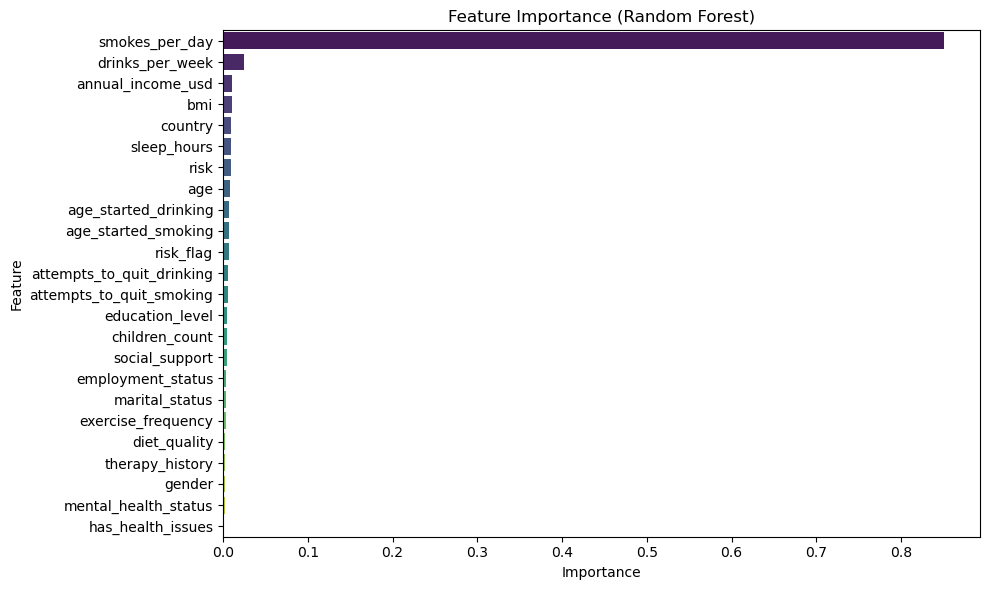

In [43]:
#Encode categorical columns
categorical_cols = df_model.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

#Split and scale
X = df_model.drop(columns='risky_behavior')
y = df_model['risky_behavior']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Feature Importance from Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices], hue = features[indices], palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

<Figure size 1500x600 with 0 Axes>

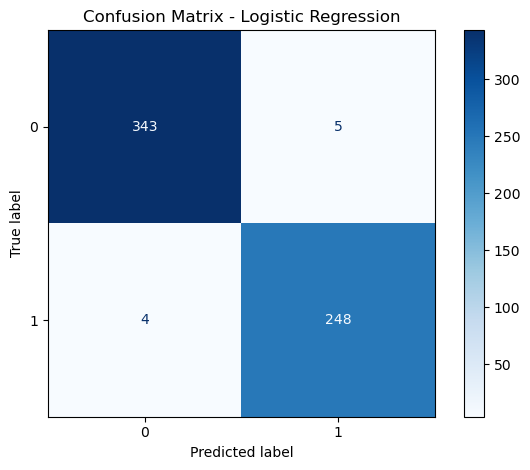

In [44]:
#Confusion Matrix from Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

plt.figure(figsize=(15, 6))
ConfusionMatrixDisplay.from_estimator(log_model, X_test_scaled, y_test, cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()

---